In [49]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

Read the csv file

In [2]:
df = pd.read_csv('../data/datasetCOIL20.csv', header = None, sep = ';')

Make all the values of the dataset floating

In [3]:
df = df[:].astype('float64')

In [4]:
print(df)

      0         1         2         3         4         5         6     \
0      1.0  0.015686  0.015686  0.015686  0.015686  0.015686  0.015686   
1      1.0  0.019608  0.019608  0.019608  0.019608  0.019608  0.019608   
2      1.0  0.015686  0.015686  0.015686  0.015686  0.015686  0.015686   
3      1.0  0.015686  0.015686  0.015686  0.015686  0.015686  0.015686   
4      1.0  0.011765  0.011765  0.011765  0.011765  0.011765  0.011765   
...    ...       ...       ...       ...       ...       ...       ...   
1435  20.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1436  20.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1437  20.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1438  20.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1439  20.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9     ...      1015      1016      1017  \
0     0.015686  0.015686  0.095098  ..

In [5]:
print(df.columns[0:])

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024],
           dtype='int64', length=1025)


In [6]:
#df = df.iloc[:,1:-1]

In [7]:
#print(df)

In [8]:
def isSparse(matrix,m,n):
    counter=0
    for i in range(m):
        for j in range(n):
            if (matrix[i][j] == 0):
                counter+=1
            
    print (counter)
    print (m*n/2)
    return counter>((m*n)/2)

In [9]:
sparse = isSparse(df.values,df.shape[0],df.shape[1])

507053
738000.0


In [10]:
print("Is the dataset sparse? " +str(sparse))

Is the dataset sparse? False


Compute pairwise correlation of columns, excluding NA/null values.

(Calcola la correlazione a coppie delle colonne, esclusi i valori NA/null.)

In [11]:
corr=df.corr()

Show the heatmap

<AxesSubplot:>

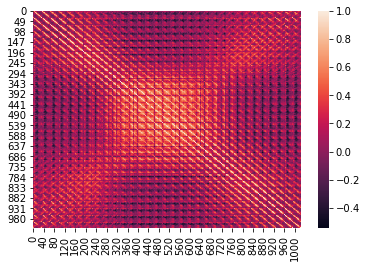

In [12]:
sns.heatmap(corr)

numpy.full(shape, fill_value, dtype=None, order='C')[source]

Return a new array of given shape and type, filled with fill_value.

In [13]:
columns = np.full((corr.shape[0],), True, dtype=bool)

In [14]:
print(columns.size)

1025


In [15]:
print(columns.shape)

(1025,)


In [16]:
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [17]:
selected_columns = df.columns[columns]

In [18]:
print(selected_columns)

Int64Index([   0,    1,    2,    4,    5,    6,    9,   10,   13,   14,
            ...
            1006, 1007, 1008, 1011, 1012, 1017, 1018, 1019, 1020, 1021],
           dtype='int64', length=211)


In [19]:
columns

array([ True,  True,  True, ..., False, False, False])

In [20]:
df = df[selected_columns]

In [21]:
print(df)

      0         1         2         4         5         6         9     \
0      1.0  0.015686  0.015686  0.015686  0.015686  0.015686  0.095098   
1      1.0  0.019608  0.019608  0.019608  0.019608  0.019608  0.160539   
2      1.0  0.015686  0.015686  0.015686  0.015686  0.015686  0.294118   
3      1.0  0.015686  0.015686  0.015686  0.015686  0.015686  0.325980   
4      1.0  0.011765  0.011765  0.011765  0.011765  0.011765  0.338725   
...    ...       ...       ...       ...       ...       ...       ...   
1435  20.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.061275   
1436  20.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.143382   
1437  20.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.167157   
1438  20.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.090196   
1439  20.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.203922   

          10        13        14    ...      1006      1007      1008  \
0     0.303186  0.110294  0.015931  ..

Remove labels from the examined colums, because is the one we want to predict

In [22]:
selected_columns = selected_columns[1:].values

In [23]:
print(selected_columns)

[   1    2    4    5    6    9   10   13   14   15   16   17   18   19
   20   25   26   27   28   29   30   33   34   35   36   41   45   46
   47   58   59   60   61   62   63   65   66   67   68   78   79   93
   94   95   96   98   99  100  103  104  111  112  128  129  130  131
  135  160  161  162  166  189  193  194  198  205  222  224  236  240
  241  242  243  244  268  269  270  271  272  273  274  275  276  289
  300  301  302  303  304  305  306  307  308  319  324  325  326  331
  332  334  335  336  337  338  339  340  341  351  352  355  356  367
  368  369  370  371  372  384  416  660  672  676  677  685  686  687
  688  689  690  691  692  704  715  716  717  718  719  720  721  722
  723  724  736  748  749  750  751  752  753  754  755  756  780  781
  782  783  784  785  786  787  801  832  833  834  845  862  864  865
  866  893  897  898  899  903  924  928  930  931  932  943  944  961
  962  963  964  973  974  975  985  986  987  988  989  990  995  996
  997 

We assume to null hypothesis to be “The selected combination of dependent variables do not have any effect on the independent variable”.

Then we build a small regression model and calculate the p values.

If the p values is higher than the threshold (SL), we discard that combination of features.

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

(Assumiamo che l'ipotesi nulla sia "La combinazione selezionata di variabili dipendenti non ha alcun effetto sulla variabile indipendente".

Quindi costruiamo un piccolo modello di regressione e calcoliamo i valori p.

Se i valori di p sono maggiori della soglia (SL), scartiamo quella combinazione di caratteristiche.)

In [24]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [25]:
X=df.iloc[:,1:]

In [26]:
print(X)

          1         2         4         5         6         9         10    \
0     0.015686  0.015686  0.015686  0.015686  0.015686  0.095098  0.303186   
1     0.019608  0.019608  0.019608  0.019608  0.019608  0.160539  0.326961   
2     0.015686  0.015686  0.015686  0.015686  0.015686  0.294118  0.374510   
3     0.015686  0.015686  0.015686  0.015686  0.015686  0.325980  0.333824   
4     0.011765  0.011765  0.011765  0.011765  0.011765  0.338725  0.270098   
...        ...       ...       ...       ...       ...       ...       ...   
1435  0.000000  0.000000  0.000000  0.000000  0.000000  0.061275  0.416912   
1436  0.000000  0.000000  0.000000  0.000000  0.000000  0.143382  0.479167   
1437  0.000000  0.000000  0.000000  0.000000  0.000000  0.167157  0.499755   
1438  0.000000  0.000000  0.000000  0.000000  0.000000  0.090196  0.427451   
1439  0.000000  0.000000  0.000000  0.000000  0.000000  0.203922  0.508088   

          13        14        15    ...      1006      1007    

In [27]:
Y=df.iloc[:,0]

In [28]:
print(Y)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
1435    20.0
1436    20.0
1437    20.0
1438    20.0
1439    20.0
Name: 0, Length: 1440, dtype: float64


In [29]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(X.values,Y.values, SL, selected_columns)

In [30]:
result = pd.DataFrame()

In [31]:
print(result)

Empty DataFrame
Columns: []
Index: []


In [32]:
result['label'] = df.iloc[:,0]

In [33]:
print(result)

      label
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
...     ...
1435   20.0
1436   20.0
1437   20.0
1438   20.0
1439   20.0

[1440 rows x 1 columns]


In [34]:
print(result['label'])

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
1435    20.0
1436    20.0
1437    20.0
1438    20.0
1439    20.0
Name: label, Length: 1440, dtype: float64


In [35]:
print(data_modeled)

[[0.01568627 0.01568627 0.30318628 ... 0.01568627 0.01568627 0.01568627]
 [0.01960784 0.01960784 0.32696078 ... 0.01960784 0.01960784 0.01960784]
 [0.01568627 0.01568627 0.3745098  ... 0.01568627 0.01568627 0.01568627]
 ...
 [0.         0.         0.4997549  ... 0.19387255 0.2872549  0.00220588]
 [0.         0.         0.42745098 ... 0.18602941 0.37034314 0.0122549 ]
 [0.         0.         0.50808823 ... 0.22892157 0.30171569 0.00245098]]


In [36]:
print(data_modeled.size)

87840


In [37]:
print(data_modeled.shape)

(1440, 61)


In [38]:
print(selected_columns)

[   1    4   10   20   47   66   67   99  100  104  112  131  198  205
  241  242  268  269  270  302  303  306  319  325  326  332  334  341
  351  352  356  367  368  371  384  676  685  686  688  689  704  715
  716  723  749  755  780  781  782  783  784  785  834  845  903  943
  944  975 1001 1004 1006]


In [39]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

In [40]:
print(data)

          1         4         10        20        47        66        67    \
0     0.015686  0.015686  0.303186  0.015686  0.015686  0.015686  0.015686   
1     0.019608  0.019608  0.326961  0.019608  0.019608  0.019608  0.019608   
2     0.015686  0.015686  0.374510  0.015686  0.015686  0.015686  0.015686   
3     0.015686  0.015686  0.333824  0.015686  0.015686  0.015686  0.015686   
4     0.011765  0.011765  0.270098  0.011765  0.011765  0.011765  0.011765   
...        ...       ...       ...       ...       ...       ...       ...   
1435  0.000000  0.000000  0.416912  0.000000  0.000000  0.000000  0.000000   
1436  0.000000  0.000000  0.479167  0.000000  0.000000  0.000000  0.000000   
1437  0.000000  0.000000  0.499755  0.000000  0.000000  0.000000  0.000000   
1438  0.000000  0.000000  0.427451  0.000000  0.000000  0.000000  0.000000   
1439  0.000000  0.000000  0.508088  0.000000  0.000000  0.000000  0.000000   

          99        100       104   ...      785       834     

In [41]:
data.shape

(1440, 61)

In [51]:
for i in data.columns:
    print(data[i][result['label']])

1.0     0.019608
1.0     0.019608
1.0     0.019608
1.0     0.019608
1.0     0.019608
          ...   
20.0    0.019608
20.0    0.019608
20.0    0.019608
20.0    0.019608
20.0    0.019608
Name: 1, Length: 1440, dtype: float64
1.0     0.019608
1.0     0.019608
1.0     0.019608
1.0     0.019608
1.0     0.019608
          ...   
20.0    0.019608
20.0    0.019608
20.0    0.019608
20.0    0.019608
20.0    0.019608
Name: 4, Length: 1440, dtype: float64
1.0     0.326961
1.0     0.326961
1.0     0.326961
1.0     0.326961
1.0     0.326961
          ...   
20.0    0.019608
20.0    0.019608
20.0    0.019608
20.0    0.019608
20.0    0.019608
Name: 10, Length: 1440, dtype: float64
1.0     0.019608
1.0     0.019608
1.0     0.019608
1.0     0.019608
1.0     0.019608
          ...   
20.0    0.019608
20.0    0.019608
20.0    0.019608
20.0    0.019608
20.0    0.019608
Name: 20, Length: 1440, dtype: float64
1.0     0.019608
1.0     0.019608
1.0     0.019608
1.0     0.019608
1.0     0.019608
          ...

Name: 784, Length: 1440, dtype: float64
1.0     0.606127
1.0     0.606127
1.0     0.606127
1.0     0.606127
1.0     0.606127
          ...   
20.0    0.713480
20.0    0.713480
20.0    0.713480
20.0    0.713480
20.0    0.713480
Name: 785, Length: 1440, dtype: float64
1.0     0.019608
1.0     0.019608
1.0     0.019608
1.0     0.019608
1.0     0.019608
          ...   
20.0    0.019608
20.0    0.019608
20.0    0.019608
20.0    0.019608
20.0    0.019608
Name: 834, Length: 1440, dtype: float64
1.0     0.019608
1.0     0.019608
1.0     0.019608
1.0     0.019608
1.0     0.019608
          ...   
20.0    0.019608
20.0    0.019608
20.0    0.019608
20.0    0.019608
20.0    0.019608
Name: 845, Length: 1440, dtype: float64
1.0     0.019608
1.0     0.019608
1.0     0.019608
1.0     0.019608
1.0     0.019608
          ...   
20.0    0.019608
20.0    0.019608
20.0    0.019608
20.0    0.019608
20.0    0.019608
Name: 903, Length: 1440, dtype: float64
1.0     0.054167
1.0     0.054167
1.0     0.054167
1

In [43]:
for i in data.columns:
    print(data[i])

0       0.015686
1       0.019608
2       0.015686
3       0.015686
4       0.011765
          ...   
1435    0.000000
1436    0.000000
1437    0.000000
1438    0.000000
1439    0.000000
Name: 1, Length: 1440, dtype: float64
0       0.015686
1       0.019608
2       0.015686
3       0.015686
4       0.011765
          ...   
1435    0.000000
1436    0.000000
1437    0.000000
1438    0.000000
1439    0.000000
Name: 4, Length: 1440, dtype: float64
0       0.303186
1       0.326961
2       0.374510
3       0.333824
4       0.270098
          ...   
1435    0.416912
1436    0.479167
1437    0.499755
1438    0.427451
1439    0.508088
Name: 10, Length: 1440, dtype: float64
0       0.015686
1       0.019608
2       0.015686
3       0.015686
4       0.011765
          ...   
1435    0.000000
1436    0.000000
1437    0.000000
1438    0.000000
1439    0.000000
Name: 20, Length: 1440, dtype: float64
0       0.015686
1       0.019608
2       0.015686
3       0.015686
4       0.011765
          ...

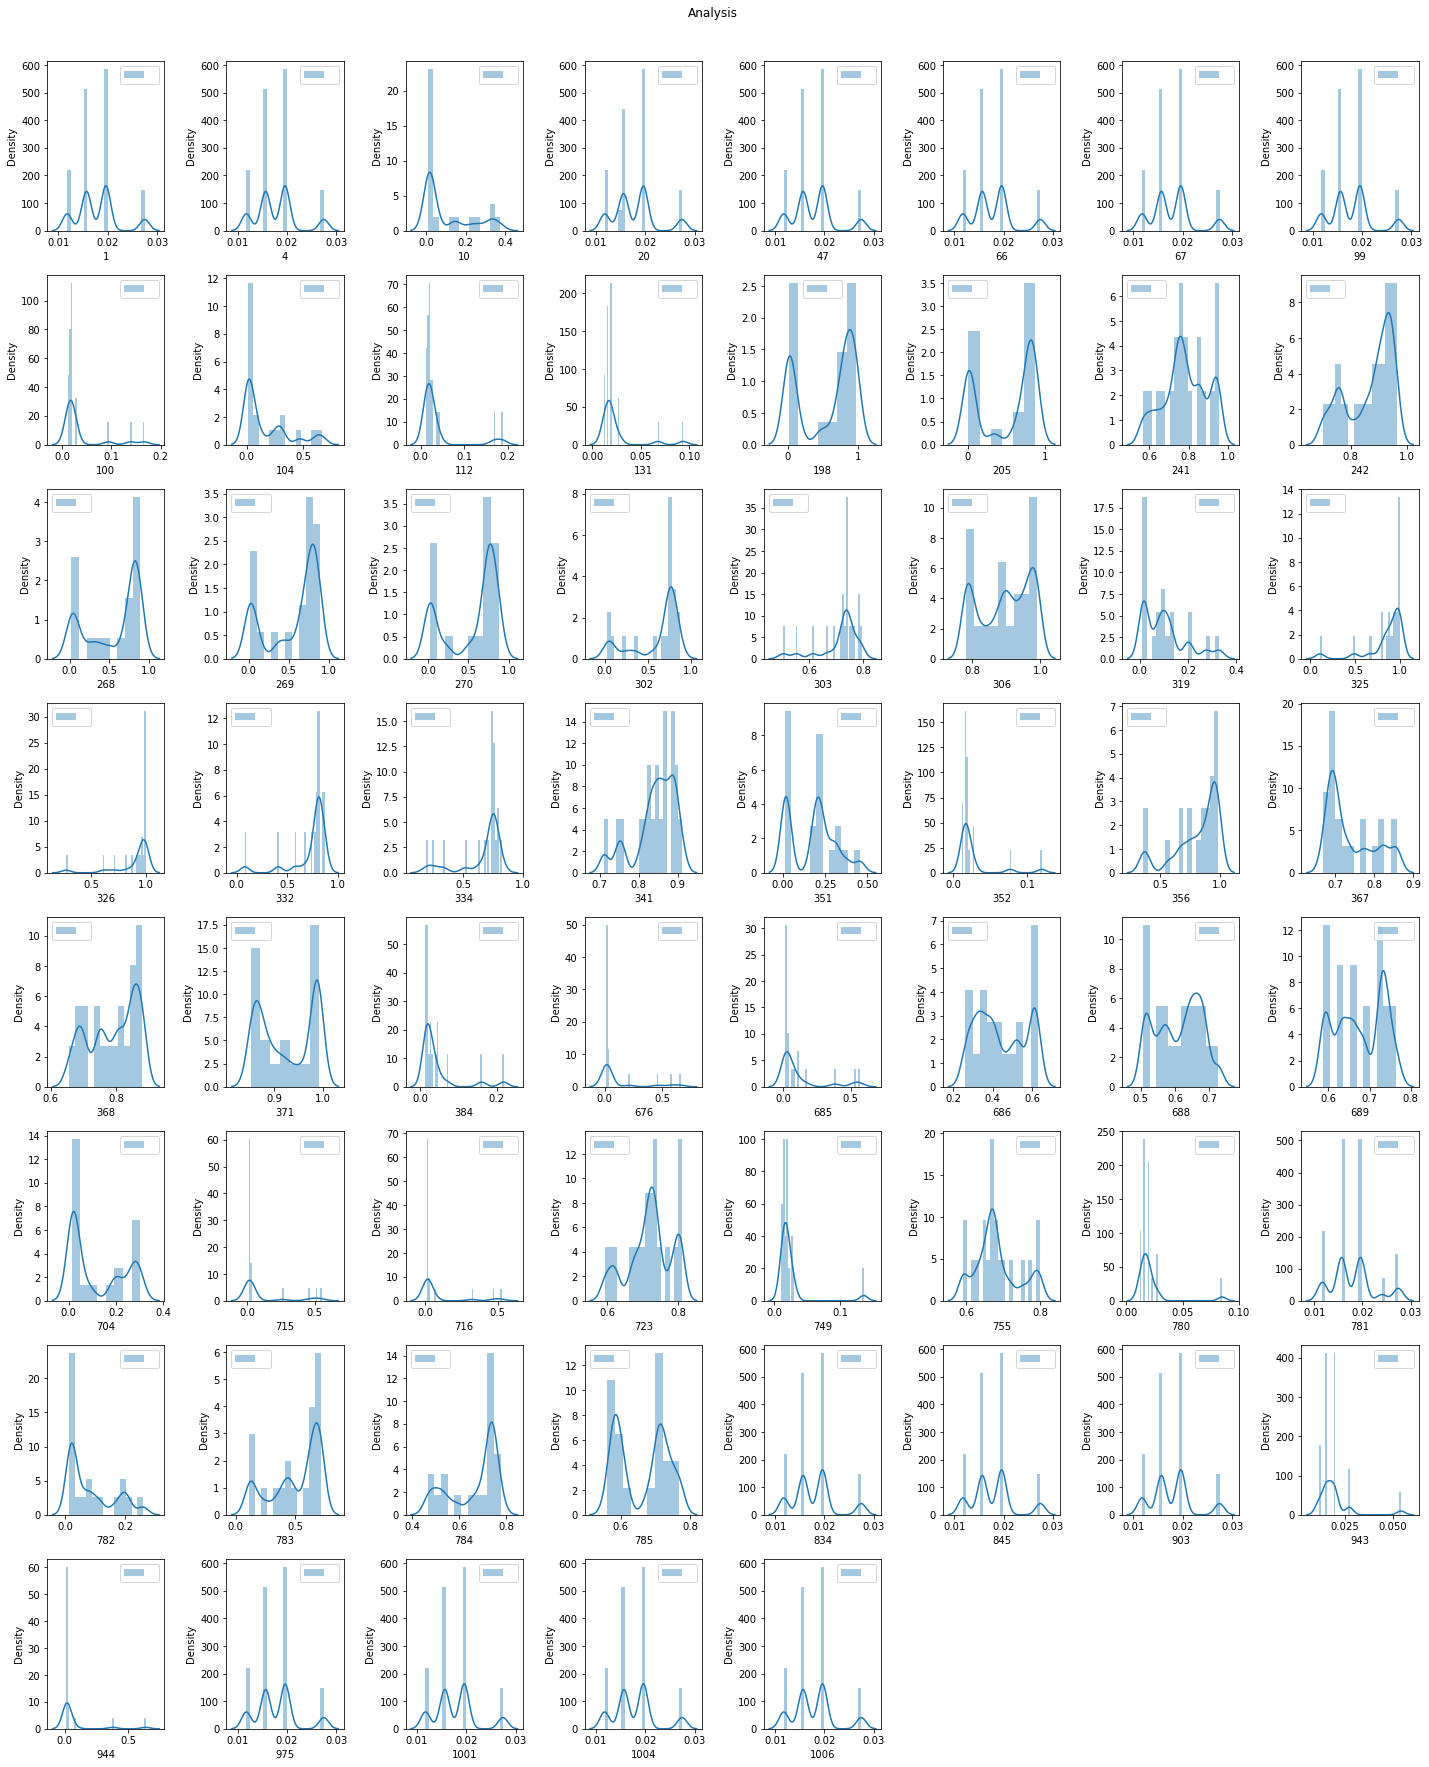

In [44]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(8, 8, j+1)
    j += 1
    sns.distplot(data[i][result['label']], label=' ')
    plt.legend(loc='best')
fig.suptitle('Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

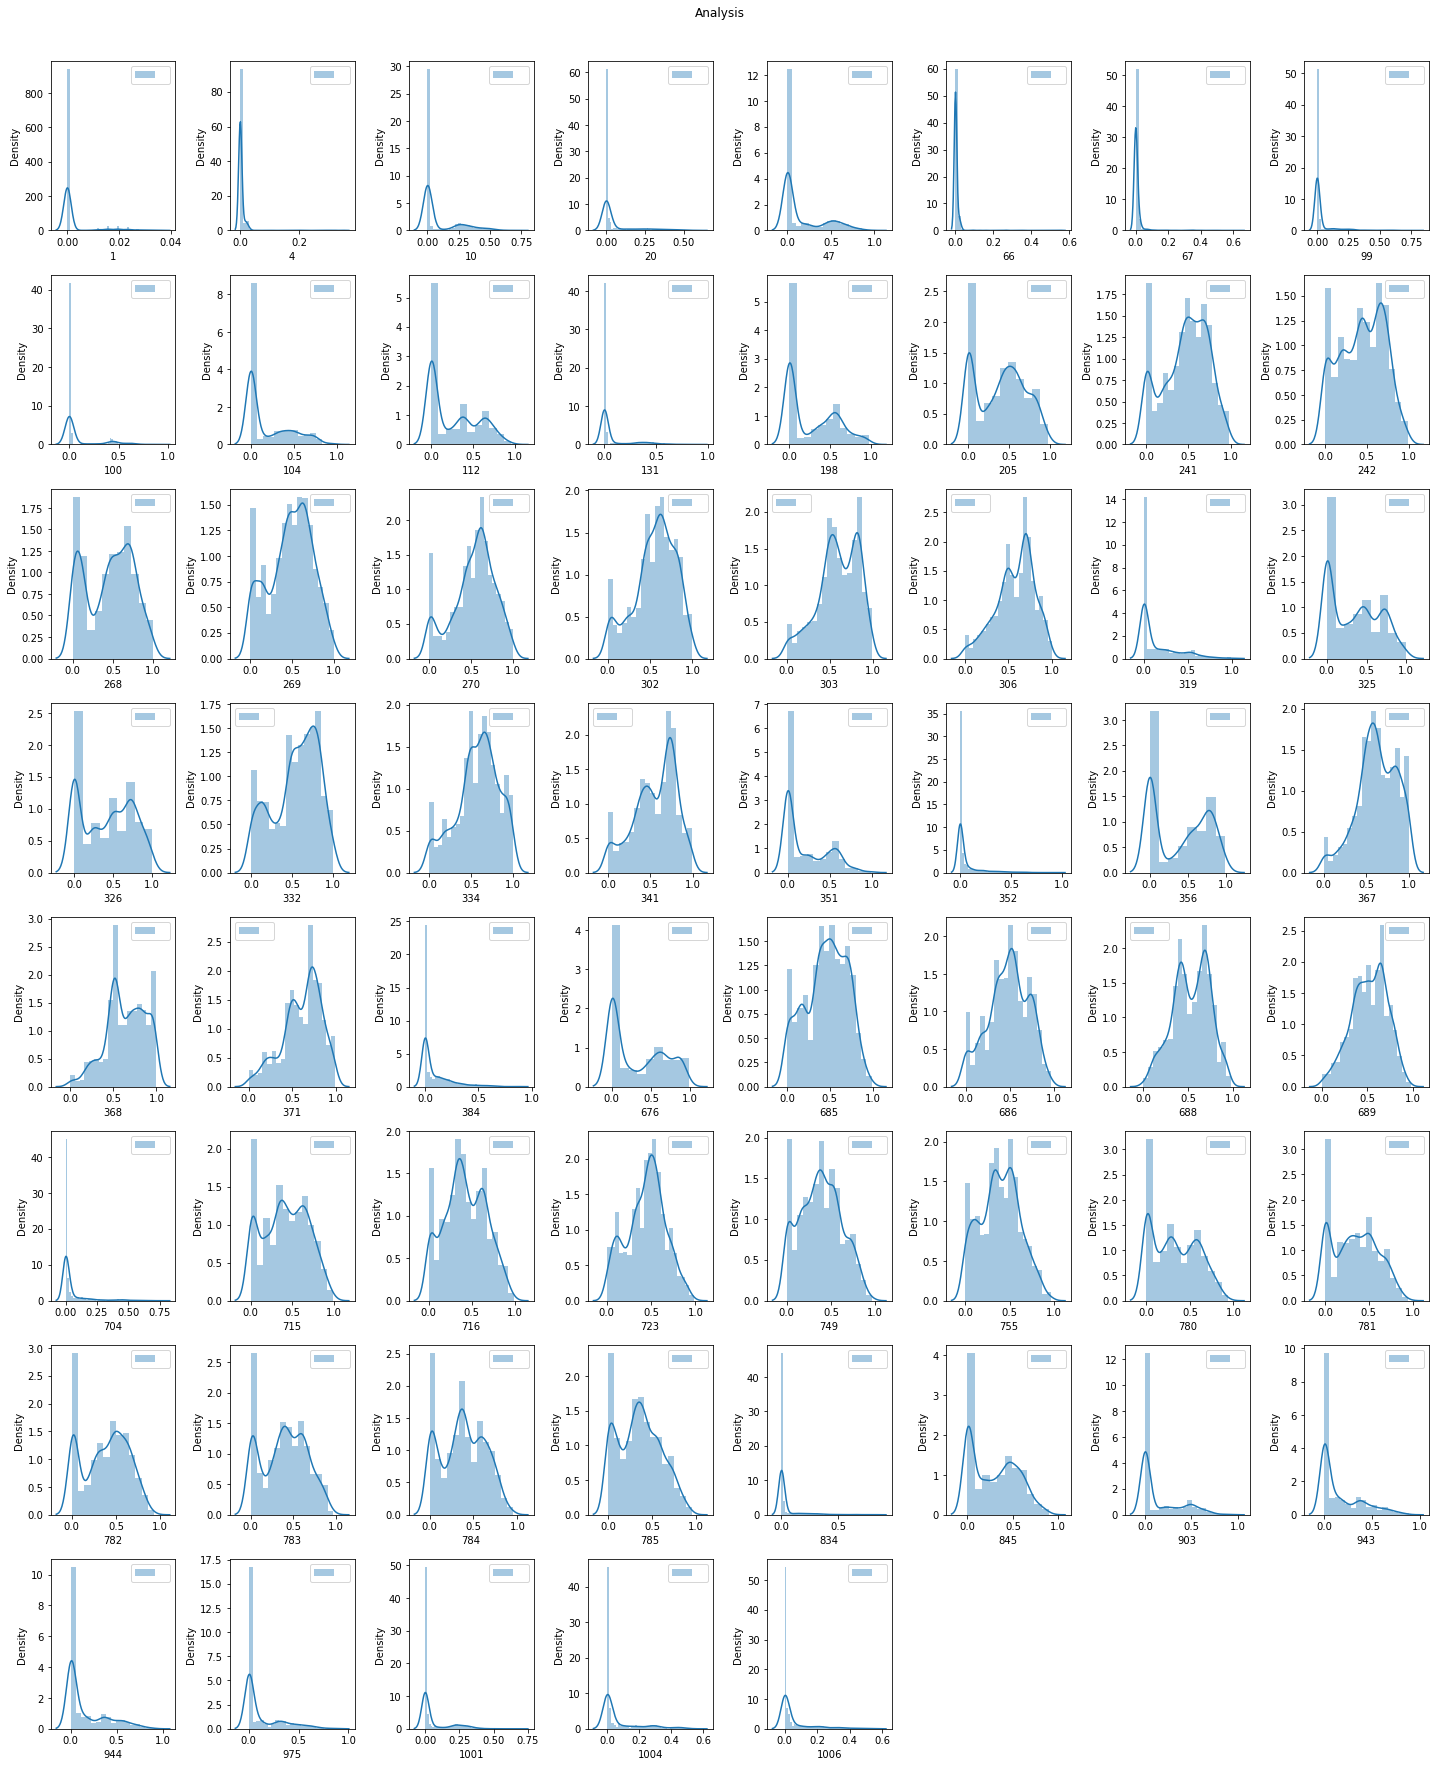

In [45]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(8, 8, j+1)
    j += 1
    sns.distplot(data[i], label=' ')
    plt.legend(loc='best')
fig.suptitle('Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [46]:
kmeans_model = KMeans(n_clusters = 4)

NameError: name 'KMeans' is not defined

In [ ]:
kmeans_model.fit(scaled_dataframe)

In [ ]:
centroids = kmeans_model.cluster_centers_
centroids

In [ ]:
kmeans_model.cluster_centers_.shape

In [ ]:
kmeans_model.labels_

In [ ]:
dataframe["cluster"] = kmeans_model.labels_

In [ ]:
dataframe

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (16,10))

sns.scatterplot(x = "proanthocyanins", y = "proline", data = scaled_dataframe, hue = "cluster", palette = "Accent", ax = ax1, legend=False)
sns.scatterplot(x = "color_intensity", y = "flavanoids", data = scaled_dataframe, hue = "cluster", palette = "Accent",ax = ax2, legend=False)
sns.scatterplot(x = "flavanoids", y = "ash", data = scaled_dataframe, hue = "cluster", palette = "Accent", ax = ax3, legend=False)
sns.scatterplot(x = "total_phenols", y = "flavanoids", data = scaled_dataframe, hue = "cluster", palette = "Accent",ax = ax4, legend=False)

plt.show()

In [ ]:
sns.pairplot(data = dataframe, hue = "cluster", palette = "Accent_r")
plt.show()

In [ ]:
#sns.pairplot(df)
#plt.show()

In [ ]:
#plt.figure(figsize = (15,4))
#sns.boxplot(data = df, orient = "h")
#plt.show()

In [ ]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)
scaled_dataframe = pd.DataFrame( scaled_array, columns = df.columns )
plt.figure(figsize = (15,4))
sns.boxplot(data = scaled_dataframe, orient = "h")
plt.show()

In [ ]:
scaled_dataframe.describe()